In [1]:
import pandas as pd
import seaborn as sns 

In [8]:
df = pd.read_csv("titanic.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


In [12]:
LL= q1-(IQR*1.5)                 
UL = q3+(IQR * 1.5)
print(LL)
print(UL)

PassengerId   -444.0000
Survived        -1.5000
Pclass           0.5000
Age             -6.6875
SibSp           -1.5000
Parch            0.0000
Fare           -26.7240
dtype: float64
PassengerId    1336.0000
Survived          2.5000
Pclass            4.5000
Age              64.8125
SibSp             2.5000
Parch             0.0000
Fare             65.6344
dtype: float64


In [13]:
lower= df<LL
print(lower)

       Age  Cabin  Embarked   Fare   Name  Parch  PassengerId  Pclass    Sex  \
0    False  False     False  False  False  False        False   False  False   
1    False  False     False  False  False  False        False   False  False   
2    False  False     False  False  False  False        False   False  False   
3    False  False     False  False  False  False        False   False  False   
4    False  False     False  False  False  False        False   False  False   
..     ...    ...       ...    ...    ...    ...          ...     ...    ...   
886  False  False     False  False  False  False        False   False  False   
887  False  False     False  False  False  False        False   False  False   
888  False  False     False  False  False  False        False   False  False   
889  False  False     False  False  False  False        False   False  False   
890  False  False     False  False  False  False        False   False  False   

     SibSp  Survived  Ticket  
0    Fal

/tmp/ipykernel_4337/166686583.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower= df<LL


In [14]:
upper=df>UL
print(upper)

       Age  Cabin  Embarked   Fare   Name  Parch  PassengerId  Pclass    Sex  \
0    False  False     False  False  False  False        False   False  False   
1    False  False     False   True  False  False        False   False  False   
2    False  False     False  False  False  False        False   False  False   
3    False  False     False  False  False  False        False   False  False   
4    False  False     False  False  False  False        False   False  False   
..     ...    ...       ...    ...    ...    ...          ...     ...    ...   
886  False  False     False  False  False  False        False   False  False   
887  False  False     False  False  False  False        False   False  False   
888  False  False     False  False  False   True        False   False  False   
889  False  False     False  False  False  False        False   False  False   
890  False  False     False  False  False  False        False   False  False   

     SibSp  Survived  Ticket  
0    Fal

/tmp/ipykernel_4337/3534953202.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper=df>UL


In [15]:
out=df[~(lower | upper).any(axis=1)]                                         #remove outliers
df=out
print(out)

     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
884          885         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                         Braund, Mr. Owen Harris    male  22.0      1      0   
2                          Heikkinen, Miss. Laina  female  26.0      0      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                        Allen, Mr. William Henry    male  35.0      0      0   
5                                Moran, Mr. James    male   NaN      0      0   
..                                            ...     ...

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Sex'>

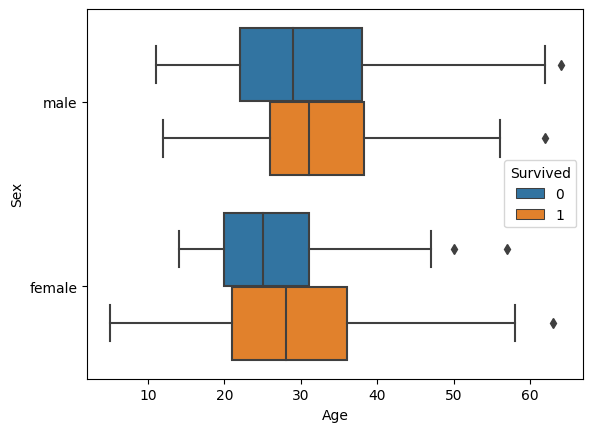

In [18]:
sns.boxplot( df['Age'], df['Sex'],hue=df['Survived'])